In [ ]:
from keras import layers
from keras.models import Sequential

autoencoder = Sequential(
    [
        layers.Input(784),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu', name='hidden'),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(784, activation='sigmoid', name='output')
    ]
)

autoencoder.summary()

In [16]:
# now we compile the model with the optimizer and loss
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
from keras.datasets import mnist
import numpy as np

# load mnist data
(x_train, _), (x_test, _) = mnist.load_data()

# we now normalize the data and flatten the images from 28x28 to 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [18]:
# and now we train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 13ms/step - loss: 0.2463 - val_loss: 0.1628
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1488 - val_loss: 0.1355
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1313 - val_loss: 0.1251
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1228 - val_loss: 0.1173
Epoch 5/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1163 - val_loss: 0.1119
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1117 - val_loss: 0.1083
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1086 - val_loss: 0.1060
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1062 - val_loss: 0.1037
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1041 - val_loss: 0.1018
Epoch 10/100
235/235 [==============================] - 3s 14ms/step - loss: 0.102

In [19]:
from keras.models import Model

encoder = Model(
    inputs=autoencoder.inputs,
    outputs=autoencoder.get_layer(name='hidden').output,
)

decoder = Model(
    inputs=autoencoder.get_layer(name='hidden').output,
    outputs=autoencoder.get_layer(name='output').output,
)

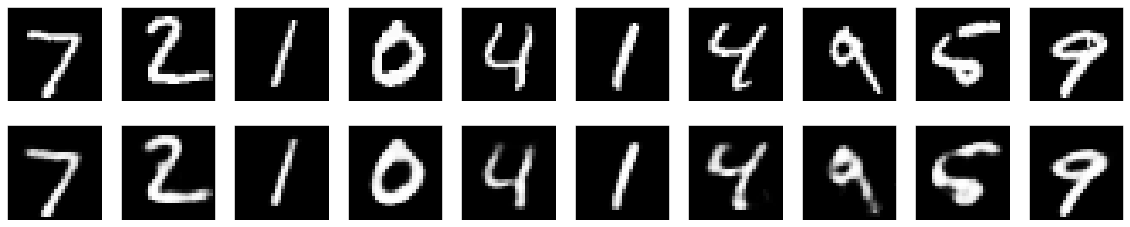

In [20]:
import matplotlib.pyplot as plt

# for the test set, we now encode and decode some images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()